In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
routing_df = pd.read_csv("comparison_routing.csv", index_col=False)
dissemination_df = pd.read_csv("comparison_dissemination.csv", index_col=False)

diss_df_dict = {
    True: dissemination_df,
    False: routing_df
}

In [18]:
def generate_plots(df_dict, algorithm, dissemination=False):
    df = df_dict[dissemination]
    algo_df = df[df['comparison_algo'] == algorithm]

    for metric in algo_df["metric"].unique():
        algo_df_tmp = algo_df[algo_df['metric'] == metric]

        # For each dataset, get the index with the maximum improvement_percentage
        idx_max = algo_df_tmp.groupby('dataset')['improvement_percentage'].idxmax()

        # Use these indices to filter the dataframe
        max_improvement_data = algo_df_tmp.loc[idx_max]

        # Sort by dataset for consistent plotting
        max_improvement_data = max_improvement_data.sort_values('dataset')

        # Now use the data with max improvement for plotting
        x = max_improvement_data['dataset']
        y_ml = max_improvement_data['ML_FOCUS_value']
        y_algo = max_improvement_data['comparison_value']

        print(x)
        print(y_ml)
        print(y_algo)

        # Create a new figure for each iteration
        plt.figure(figsize=(10, 6))

        plt.plot(x, y_ml, label='ML_FOCUS', marker='o')
        plt.plot(x, y_algo, label=algorithm, marker='s')

        plt.xlabel('Dataset')
        plt.ylabel('Value')
        plt.title(f'{"Routing" if not dissemination else "Dissemination"} performance comparison of ML_FOCUS vs {algorithm} - {metric}')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)

        plt.tight_layout()

        fig_name = f'{str(algorithm).lower()}_comparison_plot_{metric}'
        fig_name += '_dissemination.png' if dissemination else '.png'
        # Use the metric in the filename to avoid overwriting
        plt.savefig(fig_name, dpi=300)
        plt.show()

        # Optional: close the figure to free memory
        plt.close()

146    Haggle-Infocom2006
116               Sigcomm
240             StAndrews
257               UPB2011
254               UPB2012
Name: dataset, dtype: object
146    1468.28
116     185.37
240     306.63
257       4.89
254      31.69
Name: ML_FOCUS_value, dtype: float64
146    1964.76
116     293.21
240     322.74
257       5.01
254      32.53
Name: comparison_value, dtype: float64


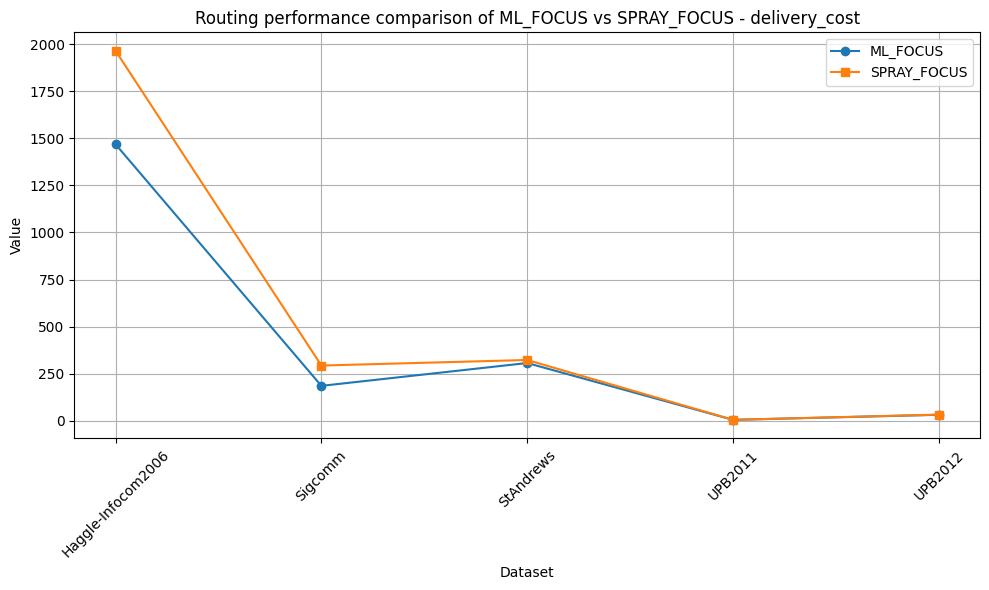

211      Haggle-Cambridge
222        Haggle-Content
121    Haggle-Infocom2006
248                  NCCU
202               Sigcomm
143        SocialBlueConn
230             StAndrews
194               UPB2011
220               UPB2012
159               UPB2015
Name: dataset, dtype: object
211     4.99
222    12.43
121    15.97
248    10.87
202    21.74
143     4.71
230     5.00
194     4.04
220     3.48
159     1.69
Name: ML_FOCUS_value, dtype: float64
211     5.45
222    13.32
121    24.56
248    11.28
202    24.08
143     6.39
230     5.31
194     4.58
220     3.73
159     2.11
Name: comparison_value, dtype: float64


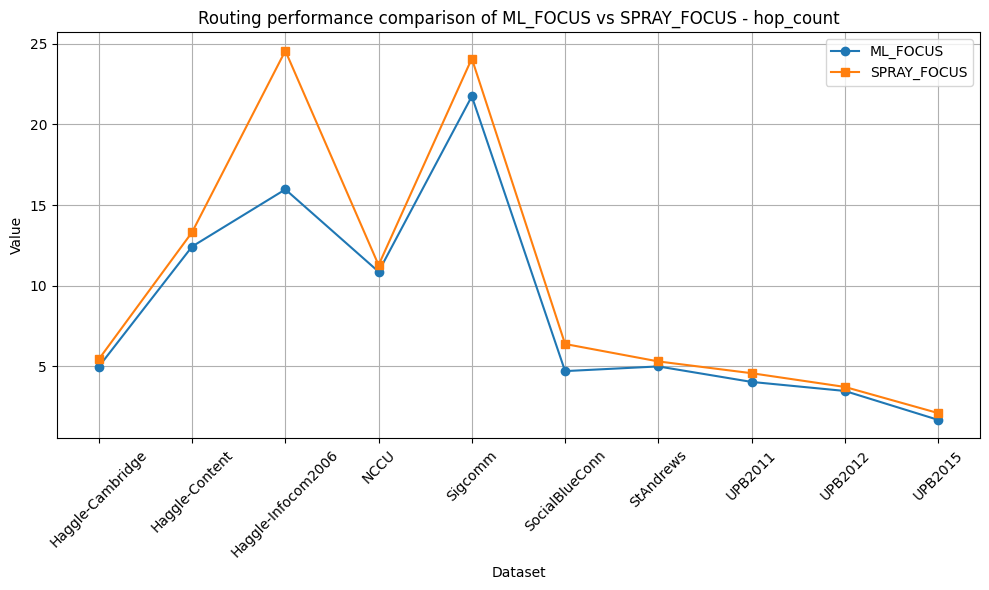

173      Haggle-Cambridge
223        Haggle-Content
158    Haggle-Infocom2006
197                  NCCU
270        SocialBlueConn
251             StAndrews
207               UPB2011
152               UPB2012
162               UPB2015
Name: dataset, dtype: object
173     37084.25
223     86091.75
158      4317.13
197    103721.37
270     59554.65
251    111464.61
207    416094.88
152    499891.39
162      2013.06
Name: ML_FOCUS_value, dtype: float64
173     44446.09
223     92269.63
158      5379.42
197    116903.06
270     59618.99
251    115389.78
207    457531.11
152    640479.32
162      2454.75
Name: comparison_value, dtype: float64


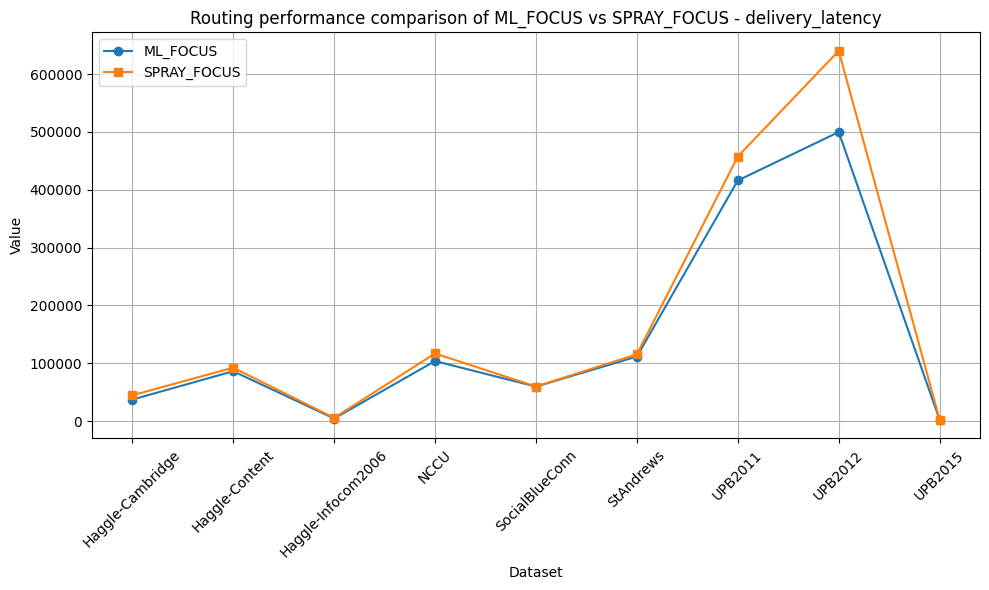

201        Haggle-Content
210    Haggle-Infocom2006
218                  NCCU
167               Sigcomm
253               UPB2011
274               UPB2012
Name: dataset, dtype: object
201    0.17
210    0.33
218    0.17
167    0.38
253    0.14
274    0.32
Name: ML_FOCUS_value, dtype: float64
201    0.15
210    0.30
218    0.16
167    0.33
253    0.13
274    0.32
Name: comparison_value, dtype: float64


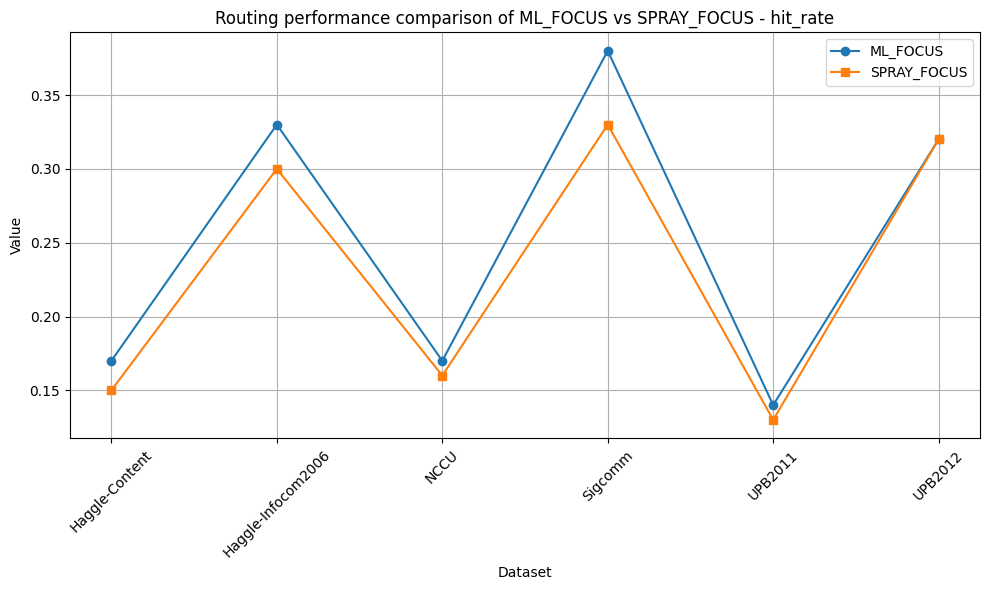

In [14]:
generate_plots(diss_df_dict, 'SPRAY_FOCUS')

18         Haggle-Content
0      Haggle-Infocom2006
39                   NCCU
16                Sigcomm
94         SocialBlueConn
6               StAndrews
112               UPB2011
27                UPB2012
179               UPB2015
Name: dataset, dtype: object
18     12.43
0      15.97
39     10.87
16     21.74
94      4.71
6       5.00
112     4.04
27      3.48
179     1.69
Name: ML_FOCUS_value, dtype: float64
18      85.02
0      618.28
39      45.30
16     168.98
94       9.11
6      104.40
112      6.65
27      18.70
179      1.97
Name: comparison_value, dtype: float64


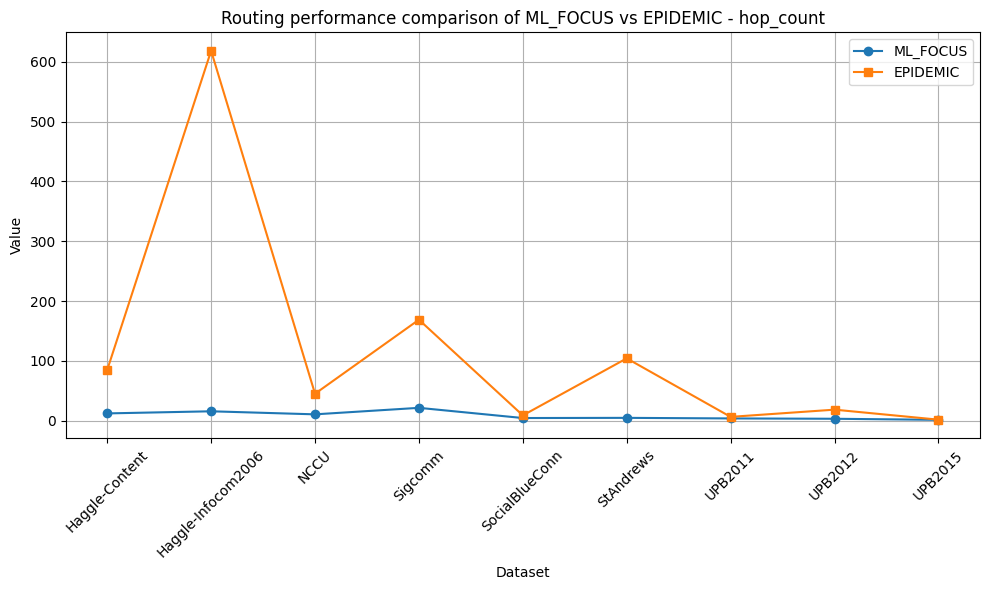

114      Haggle-Cambridge
86         Haggle-Content
82     Haggle-Infocom2006
62                   NCCU
58                Sigcomm
13         SocialBlueConn
87              StAndrews
123               UPB2011
57                UPB2012
178               UPB2015
Name: dataset, dtype: object
114      45.09
86       67.21
82     1468.28
62       32.15
58      185.37
13      241.89
87      306.63
123       4.89
57       31.69
178      26.03
Name: ML_FOCUS_value, dtype: float64
114      71.83
86      140.42
82     3288.85
62       81.56
58      496.89
13     2001.97
87      635.32
123       7.49
57       85.59
178      30.58
Name: comparison_value, dtype: float64


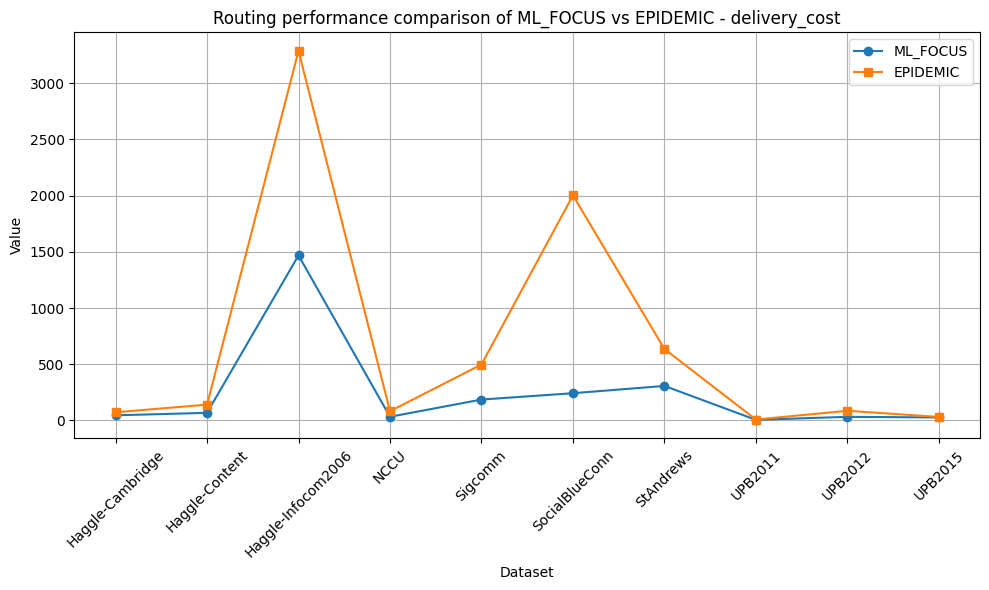

204      Haggle-Cambridge
113        Haggle-Content
26     Haggle-Infocom2006
59                   NCCU
119               Sigcomm
55              StAndrews
174               UPB2011
91                UPB2012
Name: dataset, dtype: object
204     37084.25
113     86091.75
26       4317.13
59     103721.37
119     18558.22
55     111464.61
174    416094.88
91     499891.39
Name: ML_FOCUS_value, dtype: float64
204     40886.61
113    139994.46
26      23986.33
59     272040.14
119     28765.14
55     327409.25
174    496932.67
91     969239.25
Name: comparison_value, dtype: float64


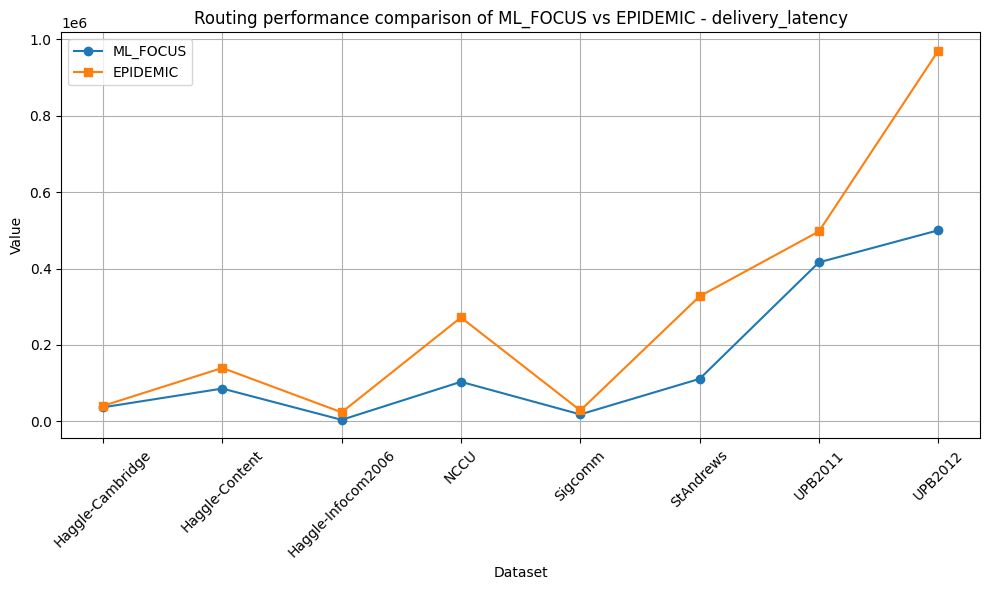

217    UPB2011
Name: dataset, dtype: object
217    0.14
Name: ML_FOCUS_value, dtype: float64
217    0.13
Name: comparison_value, dtype: float64


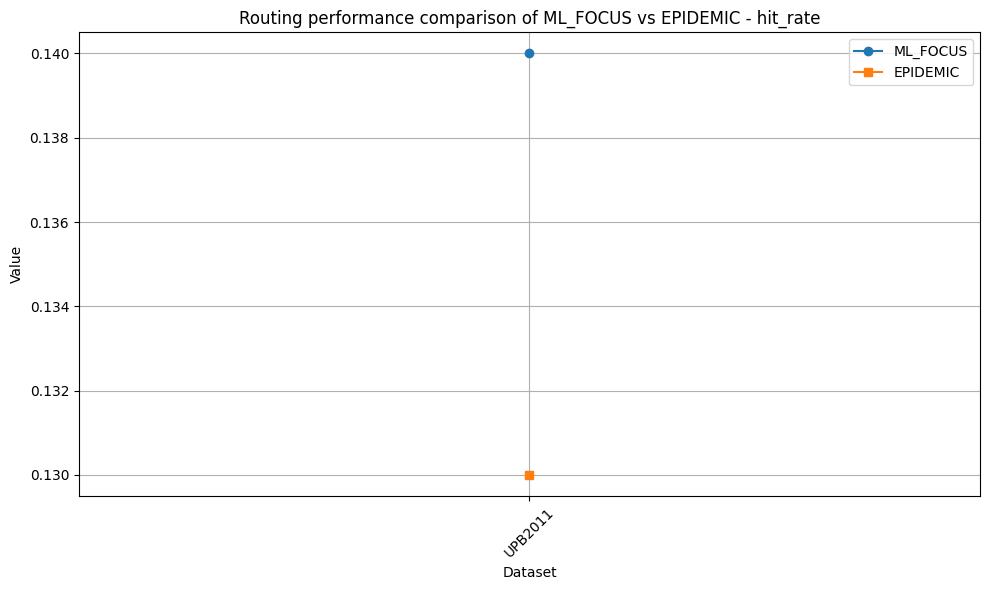

In [9]:
generate_plots(routing_df, "EPIDEMIC")

18         Haggle-Content
0      Haggle-Infocom2006
39                   NCCU
16                Sigcomm
94         SocialBlueConn
6               StAndrews
112               UPB2011
27                UPB2012
179               UPB2015
Name: dataset, dtype: object
18     12.43
0      15.97
39     10.87
16     21.74
94      4.71
6       5.00
112     4.04
27      3.48
179     1.69
Name: ML_FOCUS_value, dtype: float64
18      85.02
0      618.28
39      45.30
16     168.98
94       9.11
6      104.40
112      6.65
27      18.70
179      1.97
Name: comparison_value, dtype: float64


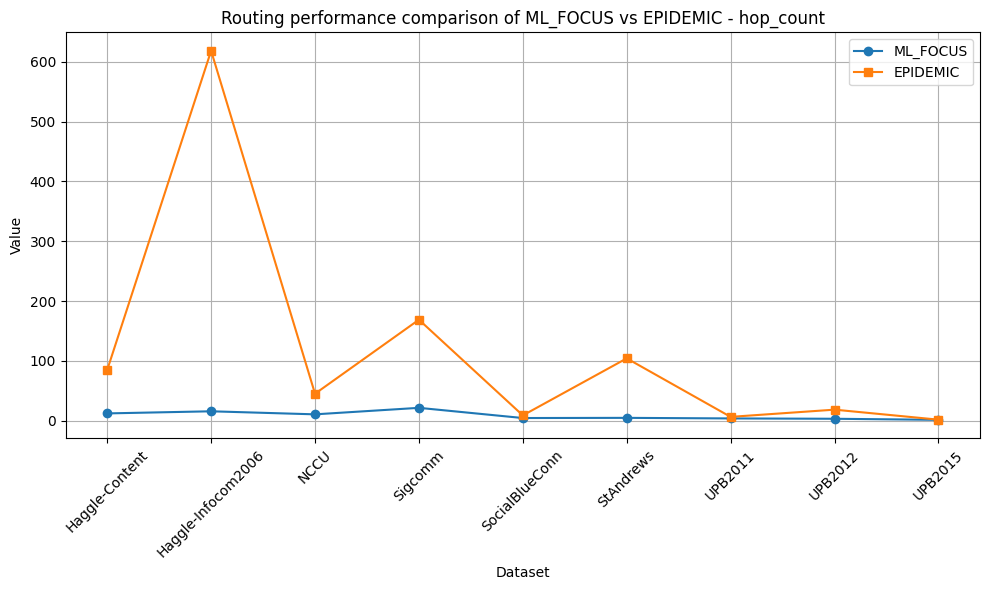

114      Haggle-Cambridge
86         Haggle-Content
82     Haggle-Infocom2006
62                   NCCU
58                Sigcomm
13         SocialBlueConn
87              StAndrews
123               UPB2011
57                UPB2012
178               UPB2015
Name: dataset, dtype: object
114      45.09
86       67.21
82     1468.28
62       32.15
58      185.37
13      241.89
87      306.63
123       4.89
57       31.69
178      26.03
Name: ML_FOCUS_value, dtype: float64
114      71.83
86      140.42
82     3288.85
62       81.56
58      496.89
13     2001.97
87      635.32
123       7.49
57       85.59
178      30.58
Name: comparison_value, dtype: float64


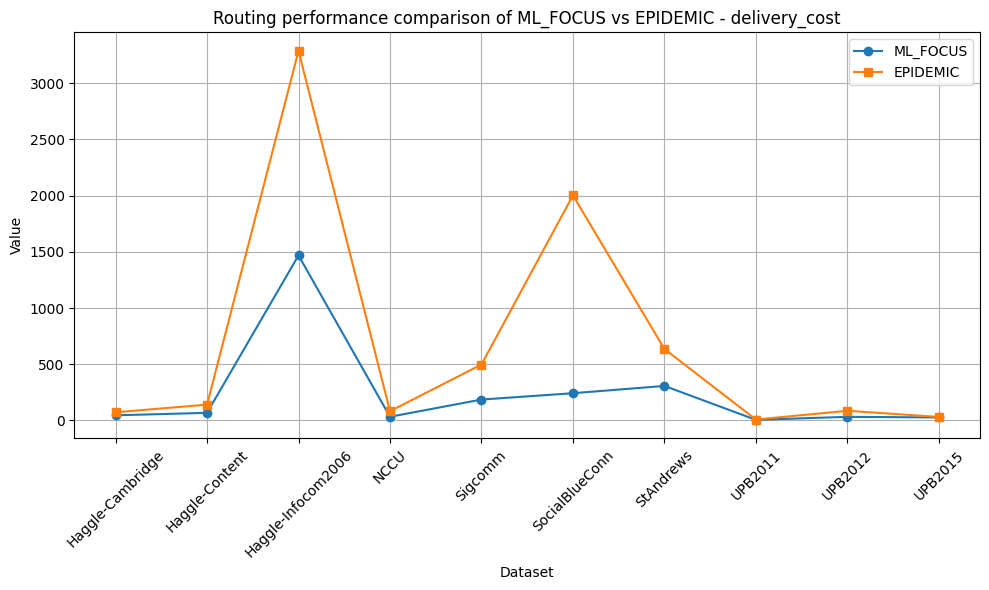

204      Haggle-Cambridge
113        Haggle-Content
26     Haggle-Infocom2006
59                   NCCU
119               Sigcomm
55              StAndrews
174               UPB2011
91                UPB2012
Name: dataset, dtype: object
204     37084.25
113     86091.75
26       4317.13
59     103721.37
119     18558.22
55     111464.61
174    416094.88
91     499891.39
Name: ML_FOCUS_value, dtype: float64
204     40886.61
113    139994.46
26      23986.33
59     272040.14
119     28765.14
55     327409.25
174    496932.67
91     969239.25
Name: comparison_value, dtype: float64


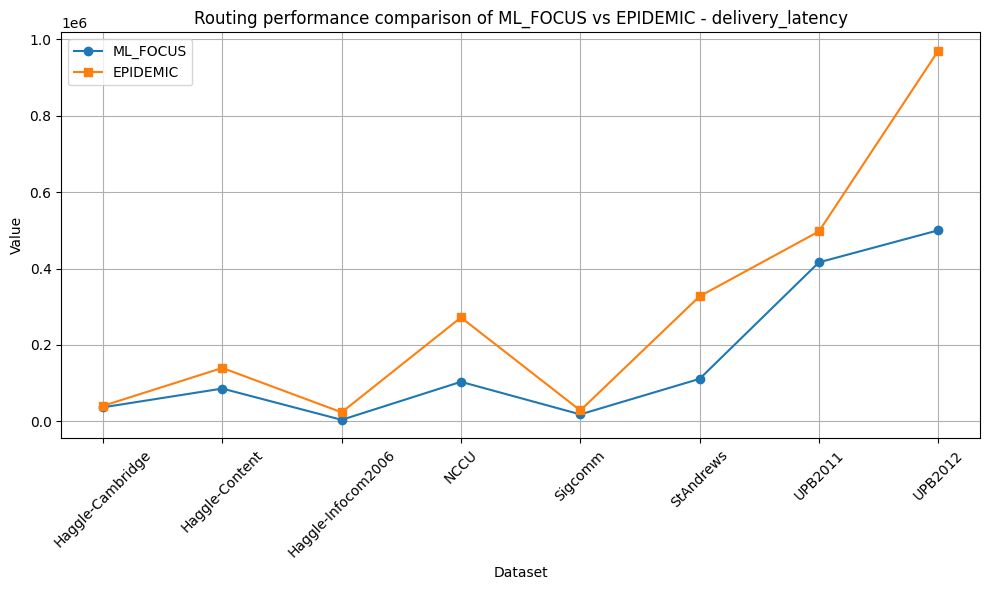

217    UPB2011
Name: dataset, dtype: object
217    0.14
Name: ML_FOCUS_value, dtype: float64
217    0.13
Name: comparison_value, dtype: float64


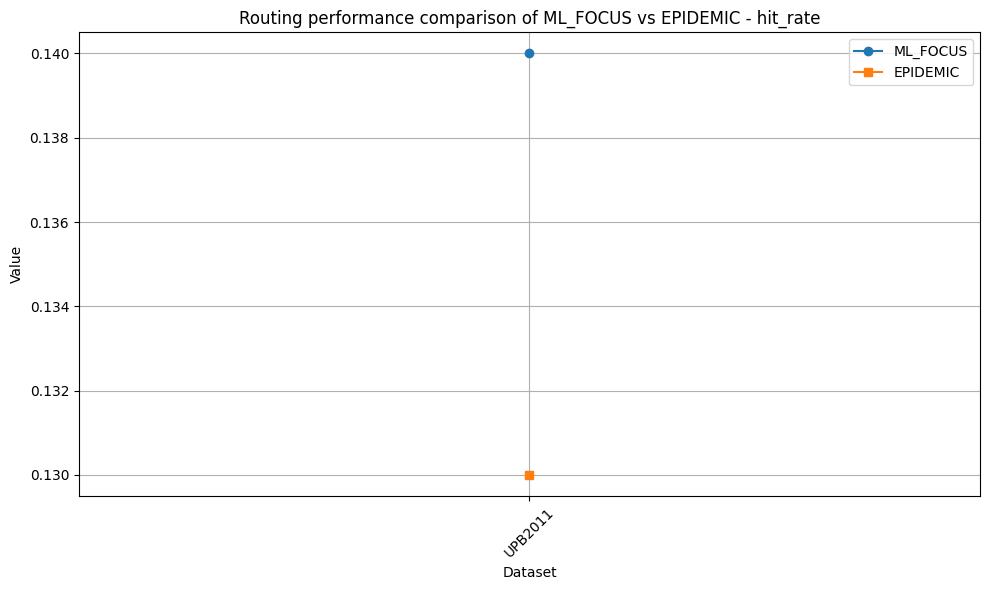

In [16]:
generate_plots(diss_df_dict, 'EPIDEMIC')

10           Sigcomm
0     SocialBlueConn
17           UPB2012
Name: dataset, dtype: object
10    10.19
0      2.47
17     1.30
Name: ML_FOCUS_value, dtype: float64
10     81.25
0     324.82
17      7.02
Name: comparison_value, dtype: float64


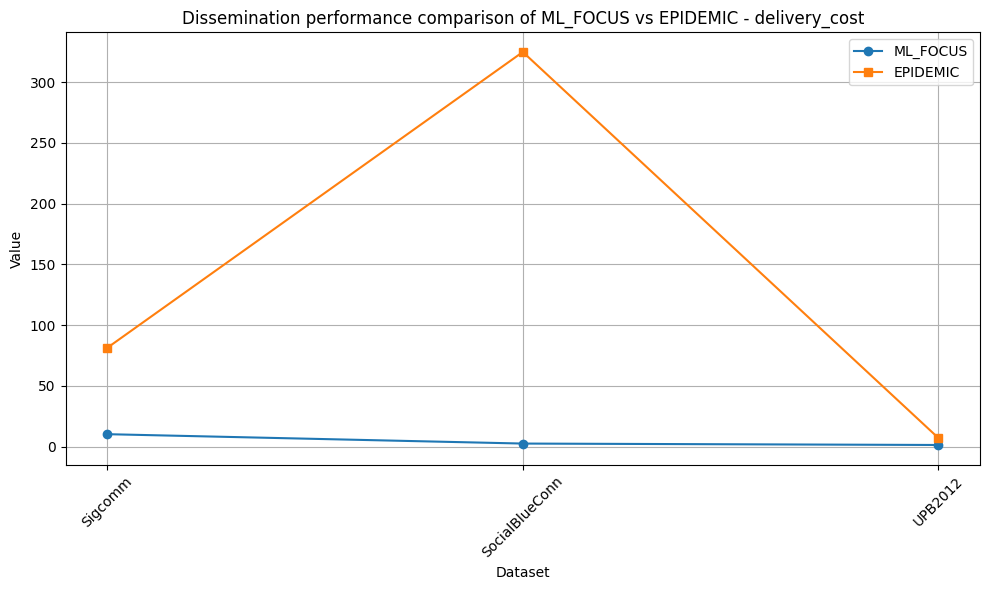

13           Sigcomm
46    SocialBlueConn
22           UPB2012
Name: dataset, dtype: object
13    49.61
46     4.69
22     6.70
Name: ML_FOCUS_value, dtype: float64
13    316.06
46      8.71
22     31.19
Name: comparison_value, dtype: float64


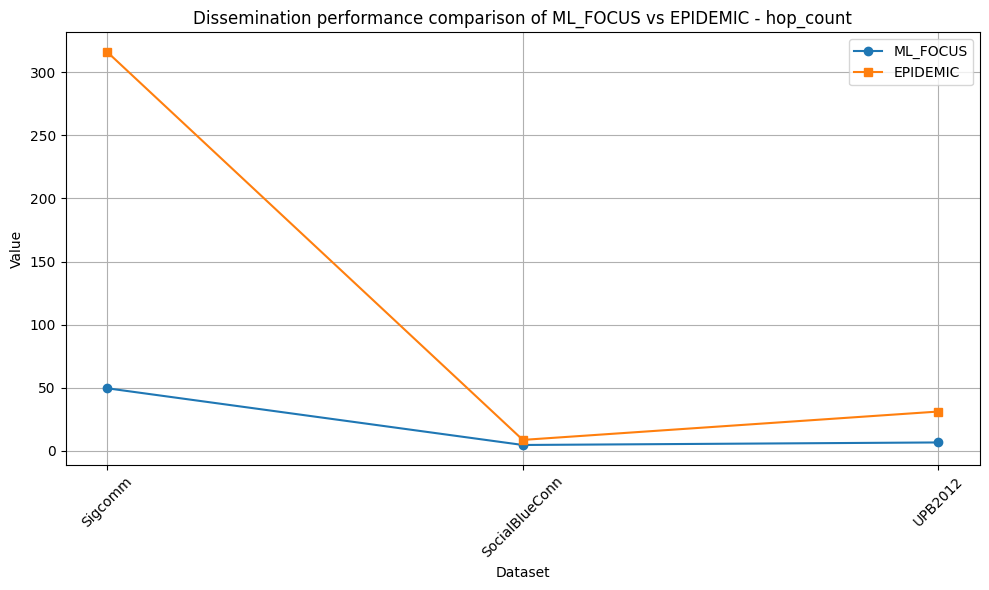

57    Sigcomm
55    UPB2012
Name: dataset, dtype: object
57     31777.26
55    656314.80
Name: ML_FOCUS_value, dtype: float64
57     45389.62
55    968274.20
Name: comparison_value, dtype: float64


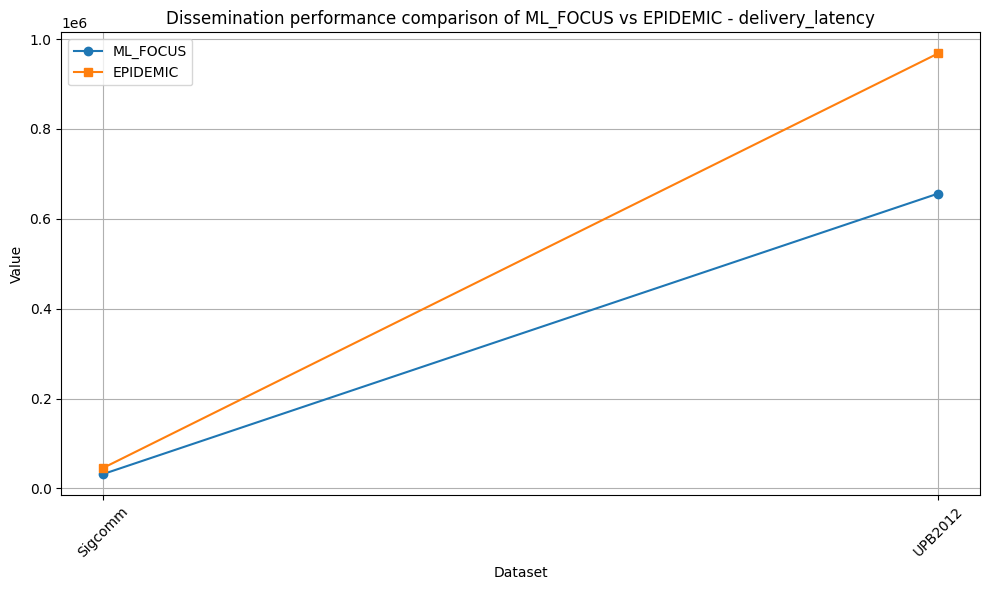

84    Sigcomm
90    UPB2012
Name: dataset, dtype: object
84    0.49
90    0.37
Name: ML_FOCUS_value, dtype: float64
84    0.46
90    0.36
Name: comparison_value, dtype: float64


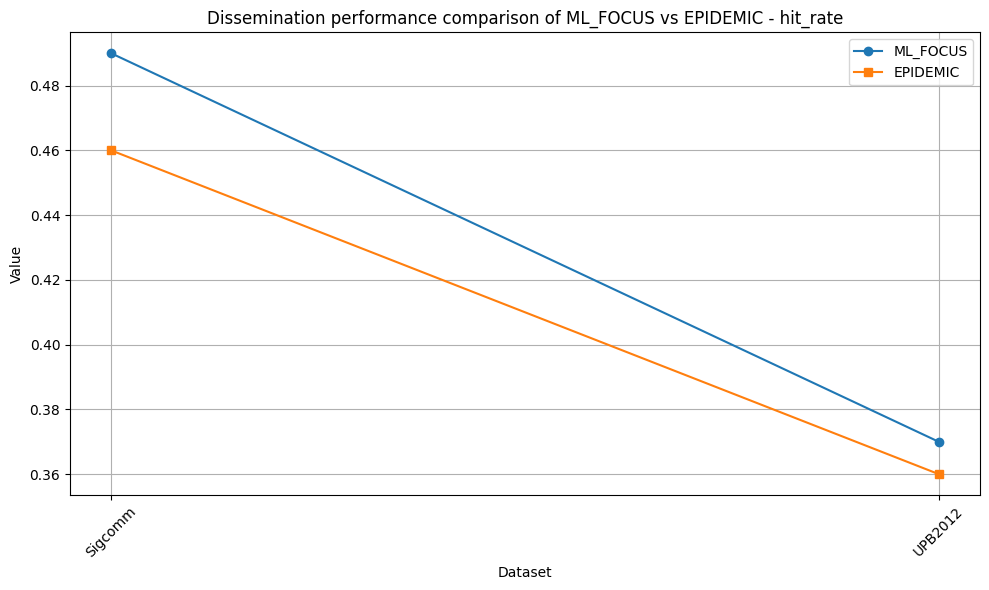

In [19]:
generate_plots(diss_df_dict, 'EPIDEMIC', True)

88           Sigcomm
6     SocialBlueConn
52           UPB2012
Name: dataset, dtype: object
88    10.19
6      2.47
52     1.30
Name: ML_FOCUS_value, dtype: float64
88    10.52
6     29.82
52     1.98
Name: comparison_value, dtype: float64


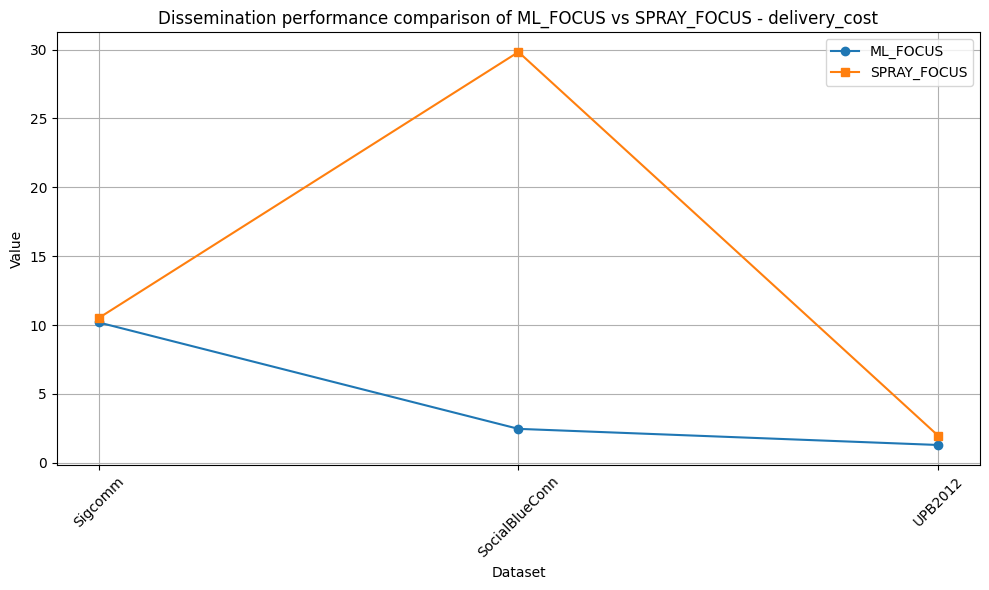

79           Sigcomm
70    SocialBlueConn
82           UPB2012
Name: dataset, dtype: object
79    49.61
70     4.69
82     6.70
Name: ML_FOCUS_value, dtype: float64
79    56.19
70     6.04
82     7.21
Name: comparison_value, dtype: float64


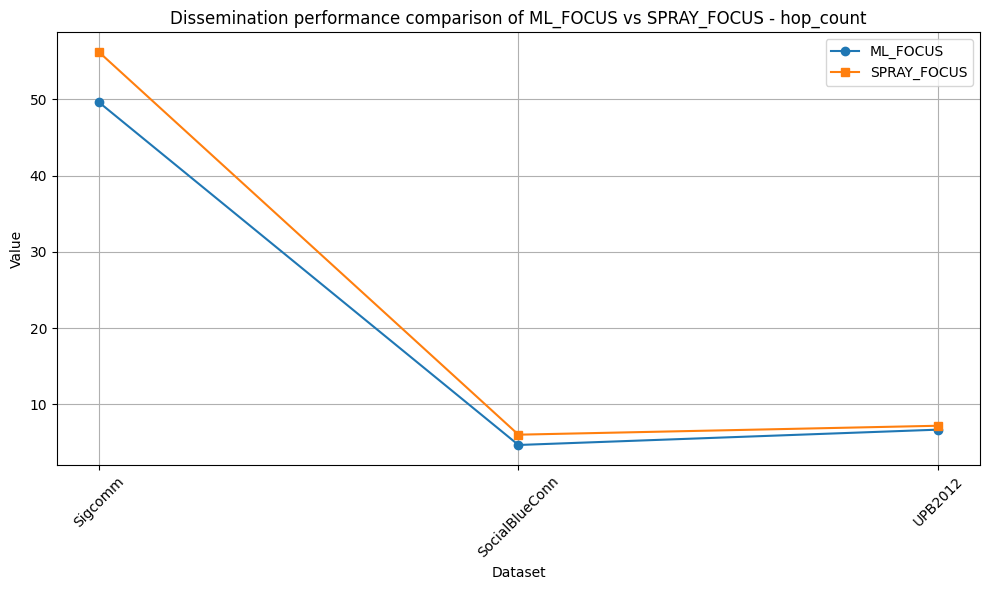

86    Sigcomm
71    UPB2012
Name: dataset, dtype: object
86    0.49
71    0.37
Name: ML_FOCUS_value, dtype: float64
86    0.47
71    0.30
Name: comparison_value, dtype: float64


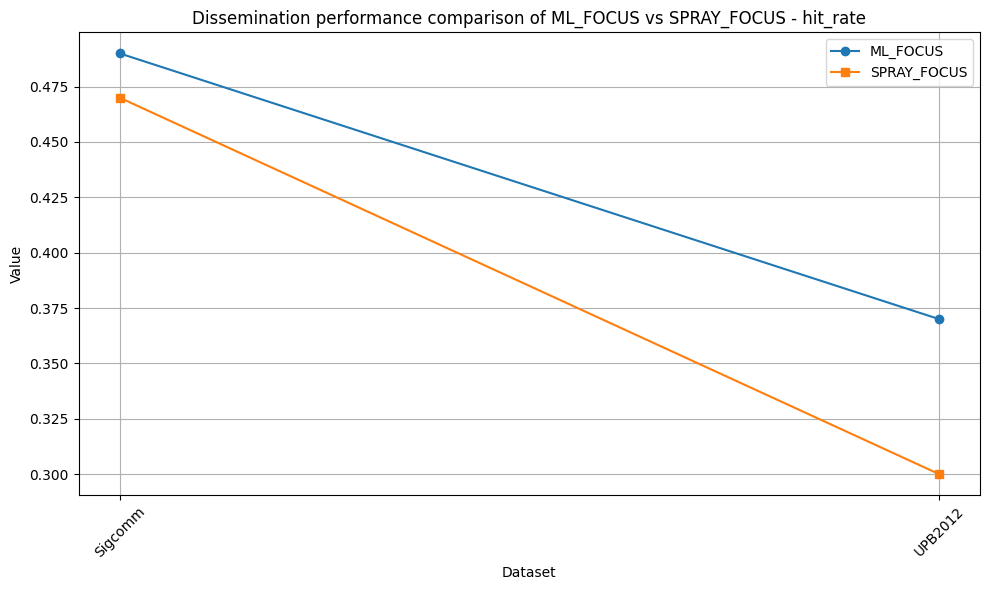

92           Sigcomm
98    SocialBlueConn
Name: dataset, dtype: object
92    31777.26
98    64807.19
Name: ML_FOCUS_value, dtype: float64
92    32354.35
98    64851.79
Name: comparison_value, dtype: float64


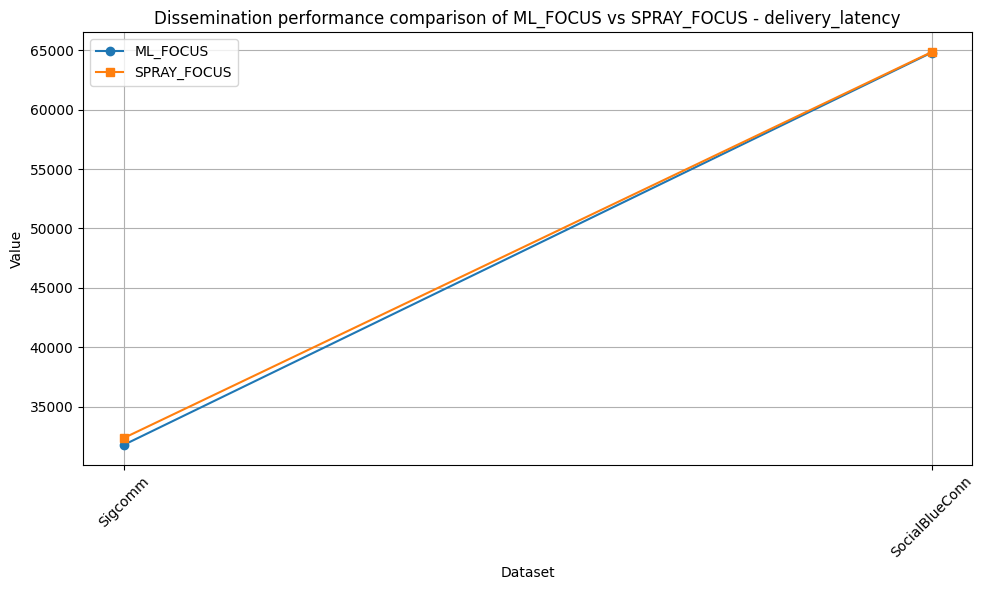

In [20]:
generate_plots(diss_df_dict, 'SPRAY_FOCUS', True)